In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_excel('View_Customer_Feedback.xlsx')

In [3]:
df.head()

,id,store,model_type,other_variant,review_id,review_title,comment,key_point,type_of_feedback,rating,review_date
0,443,Amz US,Jabra Sport Pace,NaN,126,"Sound is not that great either, on par with a ...","Constantly loses connection, virtually unusabl...",Sound Quality Rx,Negative,1,2016-07-26
1,444,Amz US,Jabra Sport Pace,NaN,126,"Sound is not that great either, on par with a ...","Constantly loses connection, virtually unusabl...",Connectivity,Negative,1,2016-07-26
2,445,Amz US,Jabra Sport Pace,NaN,127,One Star,These died twice after 2-3 months of use. Cust...,Product Durability,Negative,1,2016-07-26
3,446,Amz US,Jabra Sport Pace,NaN,128,Find something else.,"Awful headphones. Broke 3 times, very tired of...",Sound Quality Rx,Negative,1,2016-07-25
4,447,Amz US,Jabra Sport Pace,NaN,128,Find something else.,"Awful headphones. Broke 3 times, very tired of...",Physical Design,Negative,1,2016-07-25


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8808 entries, 0 to 8807
Data columns (total 11 columns):
id                  8808 non-null int64
store               8808 non-null object
model_type          8808 non-null object
other_variant       1695 non-null object
review_id           8808 non-null int64
review_title        8808 non-null object
comment             8808 non-null object
key_point           8808 non-null object
type_of_feedback    8808 non-null object
rating              8808 non-null int64
review_date         8808 non-null datetime64[ns]
dtypes: datetime64[ns](1), int64(3), object(7)
memory usage: 757.0+ KB


In [5]:
key_points=['Sound Quality Rx','Sound Quality Tx','Power/Battery','Connectivity','Functionality','Physical Design','Product Durability','Comfortability','Software/App','Others']

In [6]:
df_sound_quality_rx_positive = df.query('key_point == "Sound Quality Rx" & type_of_feedback == "Positive"')
df_comfortability_positive = df.query('key_point == "Comfortability" & type_of_feedback == "Positive"')

In [7]:
df_sound_quality_rx_positive.rating.describe()

count    1657.000000
mean        4.420640
std         0.900823
min         1.000000
25%         4.000000
50%         5.000000
75%         5.000000
max         5.000000
Name: rating, dtype: float64

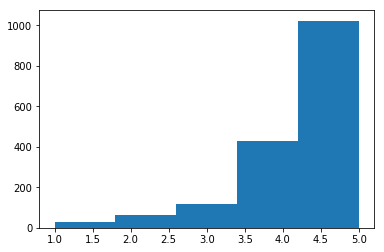

In [8]:
plt.hist(df_sound_quality_rx_positive.rating, bins=5);

In [9]:
df_comfortability_positive.rating.describe()

count    1226.000000
mean        4.454323
std         0.888908
min         1.000000
25%         4.000000
50%         5.000000
75%         5.000000
max         5.000000
Name: rating, dtype: float64

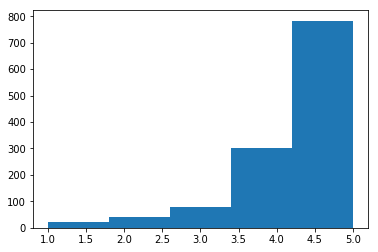

In [10]:
plt.hist(df_comfortability_positive.rating, bins=5);

In [11]:
df.groupby(['type_of_feedback', 'key_point']).rating.mean()

type_of_feedback  key_point         
Negative          Comfortability        3.030303
                  Connectivity          2.758112
                  Functionality         3.250000
                  Others                3.104712
                  Physical Design       3.648387
                  Power/Battery         2.150685
                  Product Durability    1.963415
                  Software/App          3.454545
                  Sound Quality Rx      2.735023
                  Sound Quality Tx      2.694805
Positive          Comfortability        4.454323
                  Connectivity          4.549351
                  Functionality         4.541860
                  Others                4.527132
                  Physical Design       4.380488
                  Power/Battery         4.510851
                  Product Durability    4.472000
                  Software/App          4.469027
                  Sound Quality Rx      4.420640
                  Sound Quality 

In [12]:
df[df['type_of_feedback']=='Positive'].groupby('key_point').rating.mean()

key_point
Comfortability        4.454323
Connectivity          4.549351
Functionality         4.541860
Others                4.527132
Physical Design       4.380488
Power/Battery         4.510851
Product Durability    4.472000
Software/App          4.469027
Sound Quality Rx      4.420640
Sound Quality Tx      4.552209
Name: rating, dtype: float64

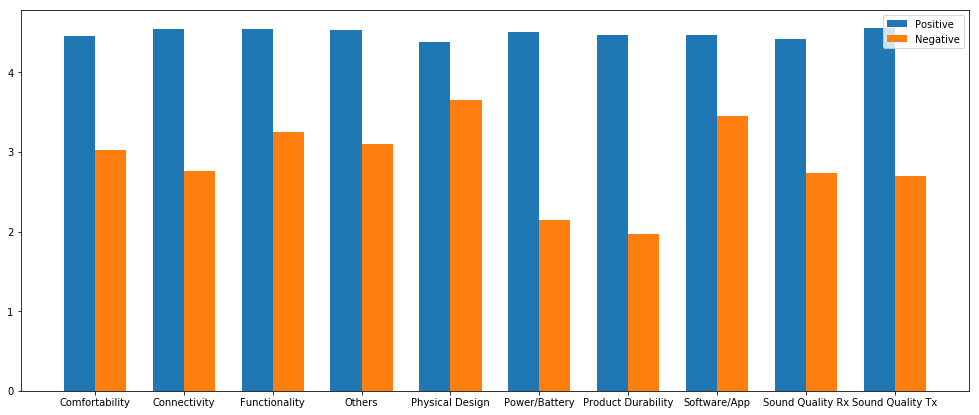

In [13]:
fig, ax = plt.subplots(figsize=(17,7))
index = np.arange(len(key_points))
bar_width = 0.35
plt.bar(index,df[df['type_of_feedback']=='Positive'].groupby('key_point').rating.mean(),bar_width,label='Positive',align='edge');
plt.bar(index+bar_width,df[df['type_of_feedback']=='Negative'].groupby('key_point').rating.mean(),bar_width,label='Negative',align='edge')
plt.xticks(index + bar_width,('Comfortability','Connectivity','Functionality','Others','Physical Design',
                               'Power/Battery','Product Durability','Software/App','Sound Quality Rx','Sound Quality Tx'))
plt.legend();

In [14]:
df.groupby(['type_of_feedback','key_point']).rating.count()

type_of_feedback  key_point         
Negative          Comfortability         528
                  Connectivity           339
                  Functionality          216
                  Others                 191
                  Physical Design        310
                  Power/Battery          292
                  Product Durability     164
                  Software/App           110
                  Sound Quality Rx       434
                  Sound Quality Tx       154
Positive          Comfortability        1226
                  Connectivity           770
                  Functionality          430
                  Others                 129
                  Physical Design        410
                  Power/Battery          599
                  Product Durability     125
                  Software/App           226
                  Sound Quality Rx      1657
                  Sound Quality Tx       498
Name: rating, dtype: int64

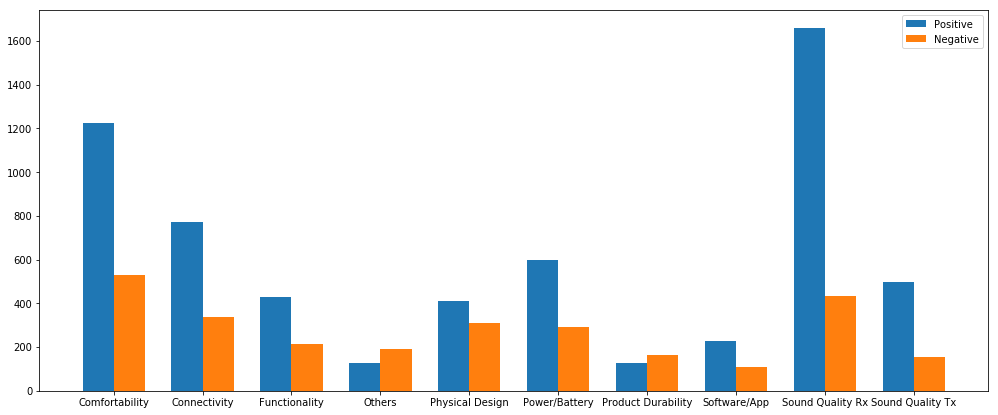

In [15]:
fig, ax = plt.subplots(figsize=(17,7))
index = np.arange(len(key_points))
bar_width = 0.35
plt.bar(index,df[df['type_of_feedback']=='Positive'].groupby('key_point').rating.count(),bar_width,label='Positive',align='edge');
plt.bar(index+bar_width,df[df['type_of_feedback']=='Negative'].groupby('key_point').rating.count(),bar_width,label='Negative',align='edge')
plt.xticks(index + bar_width,('Comfortability','Connectivity','Functionality','Others','Physical Design',
                               'Power/Battery','Product Durability','Software/App','Sound Quality Rx','Sound Quality Tx'))
plt.legend();

In [16]:
df_rename = df

In [17]:
df_rename['sound_quality_rx_positive'] = ((df_rename['key_point'] == 'Sound Quality Rx') & (df_rename['type_of_feedback'] == 'Positive')).astype('int32')
df_rename['sound_quality_rx_negative'] = ((df_rename['key_point'] == 'Sound Quality Rx') & (df_rename['type_of_feedback'] == 'Negative')).astype('int32')
df_rename['sound_quality_tx_positive'] = ((df_rename['key_point'] == 'Sound Quality Tx') & (df_rename['type_of_feedback'] == 'Positive')).astype('int32')
df_rename['sound_quality_tx_negative'] = ((df_rename['key_point'] == 'Sound Quality Tx') & (df_rename['type_of_feedback'] == 'Negative')).astype('int32')
df_rename['power_battery_positive'] = ((df_rename['key_point'] == 'Power/Battery') & (df_rename['type_of_feedback'] == 'Positive')).astype('int32')
df_rename['power_battery_negative'] = ((df_rename['key_point'] == 'Power/Battery') & (df_rename['type_of_feedback'] == 'Negative')).astype('int32')
df_rename['connectivity_positive'] = ((df_rename['key_point'] == 'Connectivity') & (df_rename['type_of_feedback'] == 'Positive')).astype('int32')
df_rename['connectivity_negative'] = ((df_rename['key_point'] == 'Connectivity') & (df_rename['type_of_feedback'] == 'Negative')).astype('int32')
df_rename['functionality_positive'] = ((df_rename['key_point'] == 'Functionality') & (df_rename['type_of_feedback'] == 'Positive')).astype('int32')
df_rename['functionality_negative'] = ((df_rename['key_point'] == 'Functionality') & (df_rename['type_of_feedback'] == 'Negative')).astype('int32')
df_rename['physical_design_positive'] = ((df_rename['key_point'] == 'Physical Design') & (df_rename['type_of_feedback'] == 'Positive')).astype('int32')
df_rename['physical_design_negative'] = ((df_rename['key_point'] == 'Physical Design') & (df_rename['type_of_feedback'] == 'Negative')).astype('int32')
df_rename['product_durability_positive'] = ((df_rename['key_point'] == 'Product Durability') & (df_rename['type_of_feedback'] == 'Positive')).astype('int32')
df_rename['product_durability_negative'] = ((df_rename['key_point'] == 'Product Durability') & (df_rename['type_of_feedback'] == 'Negative')).astype('int32')
df_rename['comfortability_positive'] = ((df_rename['key_point'] == 'Comfortability') & (df_rename['type_of_feedback'] == 'Positive')).astype('int32')
df_rename['comfortability_negative'] = ((df_rename['key_point'] == 'Comfortability') & (df_rename['type_of_feedback'] == 'Negative')).astype('int32')
df_rename['software_app_positive'] = ((df_rename['key_point'] == 'Software/App') & (df_rename['type_of_feedback'] == 'Positive')).astype('int32')
df_rename['software_app_negative'] = ((df_rename['key_point'] == 'Software/App') & (df_rename['type_of_feedback'] == 'Negative')).astype('int32')
df_rename['others_positive'] = ((df_rename['key_point'] == 'Others') & (df_rename['type_of_feedback'] == 'Positive')).astype('int32')
df_rename['others_negative'] = ((df_rename['key_point'] == 'Others') & (df_rename['type_of_feedback'] == 'Negative')).astype('int32')

In [18]:
df_rename['rating_high'] = (df_rename['rating'] >= 4).astype('int32')
df_rename['rating_low'] = 1 - df_rename['rating_high']

In [19]:
df_rename.head()

,id,store,model_type,other_variant,review_id,review_title,comment,key_point,type_of_feedback,rating,...,product_durability_positive,product_durability_negative,comfortability_positive,comfortability_negative,software_app_positive,software_app_negative,others_positive,others_negative,rating_high,rating_low
0,443,Amz US,Jabra Sport Pace,NaN,126,"Sound is not that great either, on par with a ...","Constantly loses connection, virtually unusabl...",Sound Quality Rx,Negative,1,...,0,0,0,0,0,0,0,0,0,1
1,444,Amz US,Jabra Sport Pace,NaN,126,"Sound is not that great either, on par with a ...","Constantly loses connection, virtually unusabl...",Connectivity,Negative,1,...,0,0,0,0,0,0,0,0,0,1
2,445,Amz US,Jabra Sport Pace,NaN,127,One Star,These died twice after 2-3 months of use. Cust...,Product Durability,Negative,1,...,0,1,0,0,0,0,0,0,0,1
3,446,Amz US,Jabra Sport Pace,NaN,128,Find something else.,"Awful headphones. Broke 3 times, very tired of...",Sound Quality Rx,Negative,1,...,0,0,0,0,0,0,0,0,0,1
4,447,Amz US,Jabra Sport Pace,NaN,128,Find something else.,"Awful headphones. Broke 3 times, very tired of...",Physical Design,Negative,1,...,0,0,0,0,0,0,0,0,0,1


In [20]:
df_rename.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8808 entries, 0 to 8807
Data columns (total 33 columns):
id                             8808 non-null int64
store                          8808 non-null object
model_type                     8808 non-null object
other_variant                  1695 non-null object
review_id                      8808 non-null int64
review_title                   8808 non-null object
comment                        8808 non-null object
key_point                      8808 non-null object
type_of_feedback               8808 non-null object
rating                         8808 non-null int64
review_date                    8808 non-null datetime64[ns]
sound_quality_rx_positive      8808 non-null int32
sound_quality_rx_negative      8808 non-null int32
sound_quality_tx_positive      8808 non-null int32
sound_quality_tx_negative      8808 non-null int32
power_battery_positive         8808 non-null int32
power_battery_negative         8808 non-null int32
connectivi

In [21]:
df_clean = df_rename.drop_duplicates('review_id')

In [22]:
df_clean.head()

,id,store,model_type,other_variant,review_id,review_title,comment,key_point,type_of_feedback,rating,...,product_durability_positive,product_durability_negative,comfortability_positive,comfortability_negative,software_app_positive,software_app_negative,others_positive,others_negative,rating_high,rating_low
0,443,Amz US,Jabra Sport Pace,NaN,126,"Sound is not that great either, on par with a ...","Constantly loses connection, virtually unusabl...",Sound Quality Rx,Negative,1,...,0,0,0,0,0,0,0,0,0,1
2,445,Amz US,Jabra Sport Pace,NaN,127,One Star,These died twice after 2-3 months of use. Cust...,Product Durability,Negative,1,...,0,1,0,0,0,0,0,0,0,1
3,446,Amz US,Jabra Sport Pace,NaN,128,Find something else.,"Awful headphones. Broke 3 times, very tired of...",Sound Quality Rx,Negative,1,...,0,0,0,0,0,0,0,0,0,1
5,448,Amz US,Jabra Sport Pace,NaN,130,When worked - they had great sound - better th...,these stopped working a few a few days. When w...,Sound Quality Rx,Positive,2,...,0,0,0,0,0,0,0,0,0,1
8,451,Amz US,Jabra Sport Pace,NaN,132,Sweat is not its friend,Worst product Ive ever owned. They worked for ...,Sound Quality Rx,Positive,1,...,0,0,0,0,0,0,0,0,0,1


In [23]:
model_high = sm.Logit(df_clean['rating_high'],sm.add_constant(df_clean[['sound_quality_rx_positive',
                                                              'sound_quality_tx_positive',
                                                              'power_battery_positive',
                                                              'connectivity_positive',
                                                              'functionality_positive',
                                                              'physical_design_positive',
                                                              'product_durability_positive',
                                                              'comfortability_positive',
                                                              'software_app_positive']])).fit()

Optimization terminated successfully.
         Current function value: 0.428063
         Iterations 6


In [24]:
model_high.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            rating_high   No. Observations:                 3521
Model:                          Logit   Df Residuals:                     3511
Method:                           MLE   Df Model:                            9
Date:                Fri, 27 Jul 2018   Pseudo R-squ.:                  0.3240
Time:                        17:08:24   Log-Likelihood:                -1507.2
converged:                       True   LL-Null:                       -2229.4
                                        LLR p-value:                1.919e-305
===============================================================================================
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                          -1.4571      0.082    -17.800      0.000      -1.618      -1.297
sound_quality_rx_positive       3.4030      0.111     30.782      0.000       3.186       3.620
sound_quality_tx_positive       3.2954      0.249     13.246      0.000       2.808       3.783
power_battery_positive          2.9186      0.213     13.728      0.000       2.502       3.335
connectivity_positive           3.3857      0.229     14.774      0.000       2.937       3.835
functionality_positive          2.7893      0.271     10.308      0.000       2.259       3.320
physical_design_positive        2.1762      0.292      7.466      0.000       1.605       2.748
product_durability_positive     3.7084      0.748      4.959      0.000       2.243       5.174
comfortability_positive         2.8042      0.198     14.198      0.000       2.417       3.191
software_app_positive           2.5557      0.672      3.805      0.000       1.239       3.872
===============================================================================================
"""

In [25]:
model_high.params

const                         -1.457097
sound_quality_rx_positive      3.403007
sound_quality_tx_positive      3.295377
power_battery_positive         2.918615
connectivity_positive          3.385716
functionality_positive         2.789324
physical_design_positive       2.176220
product_durability_positive    3.708389
comfortability_positive        2.804171
software_app_positive          2.555709
dtype: float64

In [26]:
model_low = sm.Logit(df_clean['rating_low'],sm.add_constant(df_clean[['sound_quality_rx_negative',
                                                              'sound_quality_tx_negative',
                                                              'power_battery_negative',
                                                              'connectivity_negative',
                                                              'functionality_negative',
                                                              'physical_design_negative',
                                                              'product_durability_negative',
                                                              'comfortability_negative',
                                                              'others_negative']])).fit()

Optimization terminated successfully.
         Current function value: 0.418570
         Iterations 6


In [27]:
model_low.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             rating_low   No. Observations:                 3521
Model:                          Logit   Df Residuals:                     3511
Method:                           MLE   Df Model:                            9
Date:                Fri, 27 Jul 2018   Pseudo R-squ.:                  0.3389
Time:                        17:08:24   Log-Likelihood:                -1473.8
converged:                       True   LL-Null:                       -2229.4
                                        LLR p-value:                     0.000
===============================================================================================
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                          -1.7777      0.056    -31.670      0.000      -1.888      -1.668
sound_quality_rx_negative       3.3619      0.182     18.429      0.000       3.004       3.719
sound_quality_tx_negative       3.7702      0.439      8.592      0.000       2.910       4.630
power_battery_negative          4.3065      0.294     14.667      0.000       3.731       4.882
connectivity_negative           3.2193      0.244     13.214      0.000       2.742       3.697
functionality_negative          2.7391      0.331      8.278      0.000       2.091       3.388
physical_design_negative        2.0290      0.296      6.847      0.000       1.448       2.610
product_durability_negative     4.3205      0.397     10.895      0.000       3.543       5.098
comfortability_negative         2.5301      0.198     12.806      0.000       2.143       2.917
others_negative                 3.9750      0.434      9.159      0.000       3.124       4.826
===============================================================================================
"""

In [28]:
df_elite_sport = df_clean[df_clean['model_type']=='Jabra Elite Sport']

In [29]:
model_high = sm.Logit(df_elite_sport['rating_high'],sm.add_constant(df_elite_sport[['sound_quality_rx_positive',
                                                              'sound_quality_tx_positive',
                                                              'power_battery_positive',
                                                              'connectivity_positive',
                                                              'functionality_positive',
                                                              'physical_design_positive',
                                                              'product_durability_positive',
                                                              'comfortability_positive',
                                                              'software_app_positive'
                                                              ]])).fit()
model_high.summary()

Optimization terminated successfully.
         Current function value: 0.399443
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            rating_high   No. Observations:                 1129
Model:                          Logit   Df Residuals:                     1119
Method:                           MLE   Df Model:                            9
Date:                Fri, 27 Jul 2018   Pseudo R-squ.:                  0.3354
Time:                        17:08:24   Log-Likelihood:                -450.97
converged:                       True   LL-Null:                       -678.56
                                        LLR p-value:                 2.235e-92
===============================================================================================
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                          -1.2593      0.141     -8.961      0.000      -1.535      -0.984
sound_quality_rx_positive       3.4646      0.200     17.337      0.000       3.073       3.856
sound_quality_tx_positive       2.9641      0.781      3.793      0.000       1.432       4.496
power_battery_positive          2.8233      0.393      7.192      0.000       2.054       3.593
connectivity_positive           2.9123      0.390      7.466      0.000       2.148       3.677
functionality_positive          2.8969      0.436      6.639      0.000       2.042       3.752
physical_design_positive        3.2052      1.078      2.973      0.003       1.092       5.319
product_durability_positive     2.7634      0.794      3.479      0.001       1.207       4.320
comfortability_positive         3.4441      0.379      9.096      0.000       2.702       4.186
software_app_positive           1.9525      0.721      2.708      0.007       0.539       3.365
===============================================================================================
"""

In [30]:
model_low = sm.Logit(df_elite_sport['rating_low'],sm.add_constant(df_elite_sport[['sound_quality_rx_negative',
                                                              'sound_quality_tx_negative',
                                                              'power_battery_negative',
                                                              'connectivity_negative',
                                                              'functionality_negative',
                                                              'physical_design_negative',
                                                              'product_durability_negative',
                                                              'comfortability_negative'
                                                              ]])).fit()
model_low.summary()

Optimization terminated successfully.
         Current function value: 0.406420
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             rating_low   No. Observations:                 1129
Model:                          Logit   Df Residuals:                     1120
Method:                           MLE   Df Model:                            8
Date:                Fri, 27 Jul 2018   Pseudo R-squ.:                  0.3238
Time:                        17:08:24   Log-Likelihood:                -458.85
converged:                       True   LL-Null:                       -678.56
                                        LLR p-value:                 6.803e-90
===============================================================================================
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                          -1.9623      0.105    -18.738      0.000      -2.168      -1.757
sound_quality_rx_negative       3.3204      0.284     11.680      0.000       2.763       3.878
sound_quality_tx_negative       3.5717      1.100      3.246      0.001       1.415       5.729
power_battery_negative          3.6670      0.456      8.042      0.000       2.773       4.561
connectivity_negative           2.7608      0.415      6.655      0.000       1.948       3.574
functionality_negative          2.3677      0.537      4.406      0.000       1.315       3.421
physical_design_negative        3.3486      0.654      5.121      0.000       2.067       4.630
product_durability_negative     5.1811      1.025      5.054      0.000       3.172       7.190
comfortability_negative         2.8890      0.291      9.943      0.000       2.320       3.459
===============================================================================================
"""